In [3]:
%matplotlib inline

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score

In [11]:
x_data = np.linspace(-2, 10, 10)
y_data = 2 * x_data + 3
y_noise = np.random.normal(loc = 0, scale = 1, size = len(x_data))
y_data += y_noise

print(x_data)
print(y_data)

[-2.         -0.66666667  0.66666667  2.          3.33333333  4.66666667
  6.          7.33333333  8.66666667 10.        ]
[-0.72168972  0.40218575  2.2626835   6.16011527 10.700487   13.19391291
 16.22415207 17.07198008 19.21274774 23.38310235]


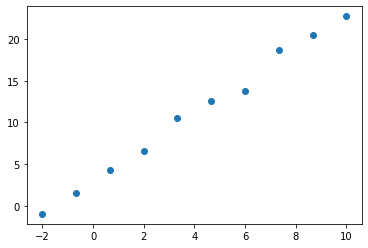

In [4]:
plt.scatter(x_data, y_data)
# plt.plot(x, y, c = "r")
plt.show()

In [5]:
def plot_trial_function(x, y, a, b):    
    y_trial = a * x + b
    plt.scatter(x, y)
    plt.plot(x, y_trial, c = "r", label = "{}x + {}".format(a, b))
    plt.legend()
    plt.show()

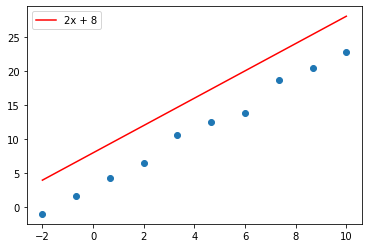

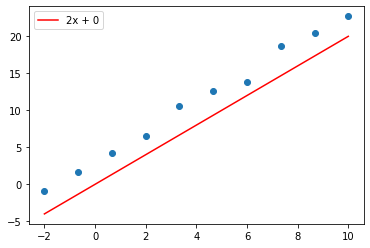

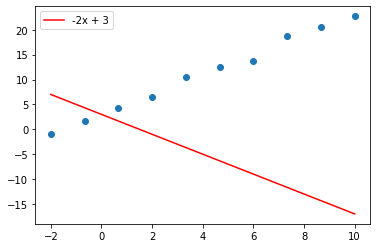

In [6]:
plot_trial_function(x_data, y_data, 2, 8)
plot_trial_function(x_data, y_data, 2, 0)
plot_trial_function(x_data, y_data, -2, 3)

In [7]:
def calculate_loss(x_i, y_i, a, b):
    y_predicted = a * x_i + b
    d = (y_i - y_predicted) ** 2
    return d

In [12]:
calculate_loss(-2, -0.72168972, 2, 8)

22.294353811953677

In [9]:
def calculate_cost(x, y, a, b):
    y_predicted = a * x + b
    d = (y - y_predicted) ** 2
    return d.sum() / len(d)

In [14]:
print(calculate_cost(x_data, y_data, 2, 8))
print(calculate_cost(x_data, y_data, 2, 0))
print(calculate_cost(x_data, y_data, -2, 3))
print(calculate_cost(x_data, y_data, 2, 3))

28.283665794472352
8.907148888335806
493.2731525140416
1.1733427281370101


In [15]:
def compute_gradients(x, y, a, b):
    a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
    b_gradient = -2 / len(y) * np.sum(y - (a * x + b))
    return (a_gradient, b_gradient)

In [16]:
compute_gradients(x_data, y_data, 0, 0)

(-147.02495244647616, -21.577935386732932)

In [17]:
compute_gradients(x_data, y_data, 1, 1)

(-77.69161911314283, -11.577935386732932)

In [33]:
learning_rate = 0.01

a, b = 0, 0
a_history, b_history = [], []
for i in range(10001):
    a_gradient, b_gradient = compute_gradients(x_data, y_data, a, b)
    a = a - learning_rate * a_gradient
    b = b - learning_rate * b_gradient
    if i % 5 == 0:
        a_history.append(a)
        b_history.append(b)
#         print(a, b)
print(a, b)

2.069768553393564 2.509893479792199


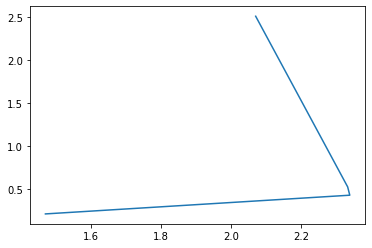

In [34]:
plt.plot(a_history, b_history)
plt.show()

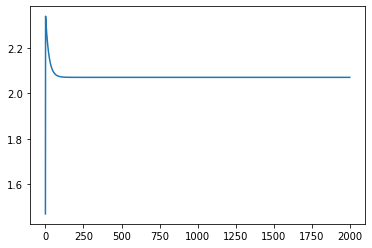

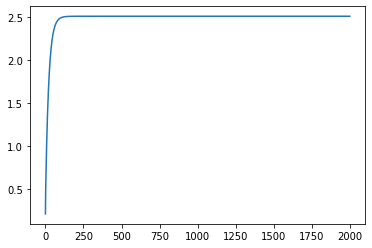

In [35]:
plt.plot(a_history)
plt.show()
plt.plot(b_history)
plt.show()

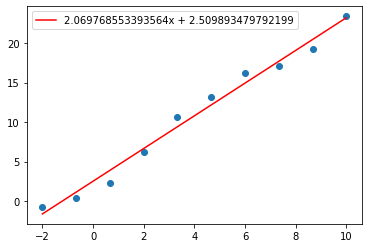

In [36]:
plot_trial_function(x_data, y_data, a, b)

In [37]:
calculate_cost(x_data, y_data, a, b)

1.057415878402031

In [49]:
x_data

array([-2.        , -0.66666667,  0.66666667,  2.        ,  3.33333333,
        4.66666667,  6.        ,  7.33333333,  8.66666667, 10.        ])

In [48]:
x_data.reshape(-1, 1)

array([[-2.        ],
       [-0.66666667],
       [ 0.66666667],
       [ 2.        ],
       [ 3.33333333],
       [ 4.66666667],
       [ 6.        ],
       [ 7.33333333],
       [ 8.66666667],
       [10.        ]])

In [36]:
model = LinearRegression()

In [52]:
model.fit(x_data.reshape(-1, 1), y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
y_pred = model.predict(x_data.reshape(-1, 1))

array([-1.62964363,  1.13004778,  3.88973918,  6.64943059,  9.40912199,
       12.1688134 , 14.9285048 , 17.6881962 , 20.44788761, 23.20757901])

In [57]:
a = model.coef_[0]

In [59]:
b = model.intercept_

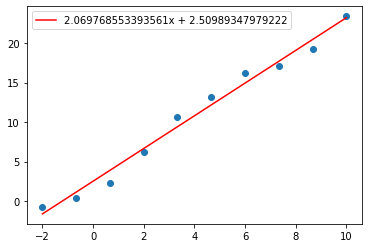

In [60]:
plot_trial_function(x_data, y_data, a, b)

In [61]:
model.score(x_data.reshape(-1, 1), y_data)

0.9834490584072206

In [1]:
a = 20.67449411
b = -30.12047857

In [19]:
x_data = np.linspace(20, 21, 10)

In [22]:
x_data = 1.2

In [23]:
y_data = a * x_data + b

In [24]:
y_data

-5.311085637999998

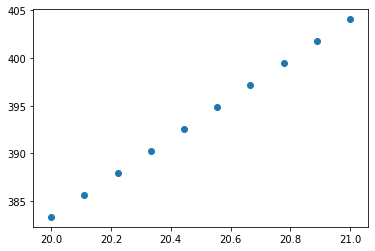

In [21]:
plt.scatter(x_data, y_data)
plt.show()

In [26]:
boston_data = load_boston()

In [28]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [33]:
boston_data.columns = boston_data.feature_names

In [42]:
model = LinearRegression()
model.fit(boston_data.data, boston_data.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
model.coef_[5]

3.8098652068092282

In [45]:
model.intercept_

36.459488385089855

In [47]:
predicted_data = model.predict(boston_data.data)

In [51]:
r2_score(boston_data.target, predicted_data)

0.7406426641094095

In [52]:
coefficient_of_determination = r2_score(boston_data.target, predicted_data)